# Benford's Law 

## Google Drive

In [ ]:
# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")
%cd /content

Mounted at /content/gdrive
/content


## Clone the project

In [2]:
#root_dir="/content/gdrive/MyDrive/VisionPE"
#project_name="icpr-benford-gan"
#project_dir="$root_dir/$project_name"
#
#cd "$root_dir"
#
#if [ ! -d "$project_dir" ] 
#then
#  git clone https://github.com/polimi-ispl/icpr-benford-gan.git "$project_dir"
#fi
#
# cd into the project
#cd "$project_dir"

# just once: clone the git repo and cd into it

%cd /content/gdrive/MyDrive/VisionPE
!git clone https://github.com/polimi-ispl/icpr-benford-gan.git
%cd /content/gdrive/MyDrive/VisionPE/icpr-benford-gan

/content/gdrive/MyDrive/VisionPE
fatal: destination path 'icpr-benford-gan' already exists and is not an empty directory.
/content/gdrive/MyDrive/VisionPE/icpr-benford-gan


## Setup the environment

### Install dependencies

In [3]:
# setup the environment
!pip install -r ../requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.8 MB/s eta 0:00:00


### Install pyjpeg-dct

In [4]:
# install pyjpeg
#%cd "/content/gdrive/MyDrive/VisionPE/icpr-benford-gan/pyjpeg-dct"
#%rm -rf "/content/gdrive/MyDrive/VisionPE/icpr-benford-gan/pyjpeg-dct/build"
#!pip install -e .
#%cd "/content/gdrive/MyDrive/VisionPE/icpr-benford-gan"

#%cd /content/gdrive/MyDrive/VisionPE/icpr-benford-gan

# remove any existing (in case of clone) pyjpeg source
#!rm -rf /content/gdrive/MyDrive/VisionPE/icpr-benford-gan/pyjpeg-dct

# copy my sources here instead
#!cp -r /content/gdrive/MyDrive/VisionPE/pyjpeg-dct-mine/ .

#!mv /content/gdrive/MyDrive/VisionPE/icpr-benford-gan/pyjpeg-dct-mine/ /content/gdrive/MyDrive/VisionPE/icpr-benford-gan/pyjpeg-dct/

%cd /content/gdrive/MyDrive/VisionPE/icpr-benford-gan/pyjpeg-dct

# install them
!pip install -e .

import jpeg

%cd /content/gdrive/MyDrive/VisionPE/icpr-benford-gan


/content/gdrive/MyDrive/VisionPE/icpr-benford-gan/pyjpeg-dct
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/gdrive/MyDrive/VisionPE/icpr-benford-gan/pyjpeg-dct
  Preparing metadata (setup.py) ... done
  Running setup.py develop for JpegPackage
/content/gdrive/MyDrive/VisionPE/icpr-benford-gan


### Test pyjpeg-dct

In [5]:
# check the module is imported correctly
import numpy as np
import jpeg

img_path = '/content/gdrive/MyDrive/VisionPE/doggo.jpg'

def extract_features_from_dct(img_path):
    # Params
    b = 8
    # Block-wise 2D-DCT (Luma only)
    img = jpeg.Jpeg(img_path)
    xmax, ymax = img.getcomponentdimensions(0)
    blocks_dct = np.zeros((xmax * ymax, b, b))
    cnt = 0
    for y in range(ymax):
        for x in range(xmax):
            block = img.getblock(x, y, 0)
            blocks_dct[cnt, :, :] = np.frombuffer(block, dtype=np.int16).reshape((8, 8))
            cnt += 1
    return blocks_dct

# try the dct extraction with the image
img_dct = extract_features_from_dct(img_path)

# img_dct -> array containing all the 8x8 blocks in which we split the image 

print('First block:')
print(img_dct[0])

First block:
[[-103.  288.  184.   46.   -5.  -11.   -8.   -3.]
 [  84.  -42.  -17.   -5.    1.    1.    1.    0.]
 [  50.  -23.  -14.   -3.    0.    1.    1.    0.]
 [  44.  -19.   -9.   -2.    0.    1.    1.    0.]
 [  27.  -13.   -4.   -1.    0.    0.    0.    0.]
 [  16.   -5.   -2.   -1.    0.    0.    0.    0.]
 [   6.   -2.   -1.    0.    0.    0.    0.    0.]
 [   2.   -1.    0.    0.    0.    0.    0.    0.]]


In [6]:
%cd /content/gdrive/MyDrive/VisionPE/icpr-benford-gan

import jpeg
img_path = '/content/gdrive/MyDrive/VisionPE/doggo.jpg'
img = jpeg.Jpeg(img_path)
print(img)

/content/gdrive/MyDrive/VisionPE/icpr-benford-gan


### Go back to project folder

In [7]:
# go back to main folder
%cd /content/gdrive/MyDrive/VisionPE/icpr-benford-gan

/content/gdrive/MyDrive/VisionPE/icpr-benford-gan


## Override model parameters


### apple2orange

This is just a stupid test

In [ ]:
!rm ./params.py
!cp ../params_apple2orange.py .
!mv ./params_apple2orange.py ./params.py

!head -n 10 ./params.py

### images1024x1024

If you want to use only this dataset, load these parameters

In [ ]:
!rm ./params.py
!cp ../params_images1024x1024.py .
!mv ./params_images1024x1024.py ./params.py

# check the first 10 rows of the params.py file just in case
!head -n 10 ./params.py

### CelebAHQ (original faces)

The CelebA-HQ dataset is a high-quality version of CelebA that consists of 30,000 images at 1024×1024 resolution. If you want to use only celebAHQ dataset use these parameters instead

In [ ]:
!rm ./params.py
!cp ../params_celebAHQ.py .
!mv ./params_celebAHQ.py ./params.py

# check the first 10 rows of the params.py file just in case
!head -n 10 ./params.py

### images1024x1024 & CelebAHQ

Only original images

In [ ]:
!rm ./params.py
!cp ../params_orig.py .
!mv ./params_orig.py ./params.py

# check the first 10 rows of the params.py file just in case
!head -n 10 ./params.py

### FaceForensics

If you want to use only this dataset, load these parameters

In [ ]:
!rm ./params.py
!cp ../params_FaceForensics.py .
!mv ./params_FaceForensics.py ./params.py

# check
!head -n 35 ./params.py

### StyleGAN2

If you want to use only this dataset, load these parameters

In [ ]:
!rm ./params.py
!cp ../params_StyleGAN2.py .
!mv ./params_StyleGAN2.py ./params.py

# check the first 10 rows of the params.py file just in case
!head -n 10 ./params.py

### FaceForensics & StyleGAN2

Only gan generated images

In [ ]:
!rm ./params.py
!cp ../params_gan.py .
!mv ./params_gan.py ./params.py

# check the first 10 rows of the params.py file just in case
!head -n 10 ./params.py

import os

root_dir = '/content/gdrive/MyDrive/VisionPE/icpr-benford-gan/'

tmp_path = '/content/gdrive/MyDrive/VisionPE/icpr-benford-gan/.temp'

# images1024x1024 dataset (original)
#images1024x1024_root = '/content/gdrive/MyDrive/VisionPE/data/images1024x1024_jpg'

# all the dataset generated will be named 'images1024x1024_orig_x_jpg'


### Everything (all in jpg)

original: images1024x1024, celebHQ -> 70000 + 30000

gan: StyleGAN2, FaceForensics -> 100000 + 3000


In [ ]:
!rm ./params.py
!cp ../params_all.py .
!mv ./params_all.py ./params.py

# check the first rows of the params.py file just in case
!head -n 10 ./params.py

### Forgery detection

In [ ]:
!rm ./params.py
!cp ../params_forgery.py .
!mv ./params_forgery.py ./params.py

# check the first rows of the params.py file just in case
!head -n 10 ./params.py

import os

root_dir = '/content/gdrive/MyDrive/VisionPE/icpr-benford-gan/'

tmp_path = '/content/gdrive/MyDrive/VisionPE/icpr-benford-gan/.temp'


# CASIA forgery dataset 
#authentic images
authentic_root = '/content/gdrive/MyDrive/VisionPE/data/CASIA2.0_forgery/Au'


### Test parameters

Check if the parameters are correct and the dataset is correctly loaded

/content/gdrive/MyDrive/VisionPE/data/CASIA2.0_forgery/Au
Dataset:         authentic_orig
Dataset content: jpg
Image:           /content/gdrive/MyDrive/VisionPE/data/CASIA2.0_forgery/Au/Au_ani_00001.jpg


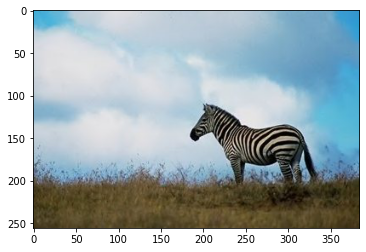

In [ ]:
# check if we can access the images with python
import os
from pathlib import Path
from params import dataset_root, dataset_ext

import matplotlib.pyplot as plt
%matplotlib inline


# get the dataset info
dataset_key = list(dataset_root.keys())[0]
dataset_path = dataset_root.get(dataset_key)
dataset_img_ext = dataset_ext.get(dataset_key)

print(dataset_path)

# create a generator to get only the first item
gen = sorted(Path(dataset_path).glob('**/*.{}'.format(dataset_img_ext)))
# gen = Path(dataset_path).glob('**/*.{}'.format(dataset_img_ext))
img_path = str(gen[0])

print('Dataset:         {}'.format(dataset_key))
print('Dataset content: {}'.format(dataset_img_ext))
print('Image:           {}'.format(img_path))

# show the image
img = plt.imread(img_path)
plt.imshow(img);


## Feature extraction & training

### Optional - delete old features

Absolutely do not run this if you don't want to lose the progress

In [ ]:
# delete, if present, the directories containing previous results
from params import features_root, results_root
import shutil
import os

directories = [features_root, results_root]

are_you_reeeeeeaally_sure = False

if are_you_reeeeeeaally_sure:
  for path in directories:
    print('Checking path {}'.format(path))
    if os.path.exists(path) and os.path.isdir(path):
      subdirs = os.listdir(path)
      empty_str = 'empty' if len(subdirs) == 0 else 'non empty'
      print('Deleting {} directory {}'.format(empty_str, path))
      shutil.rmtree(path)
else:
  print('Got you homie')

Got you homie


### Required (since we are dumb) - rename all the previously generated files

We need to rename all the features file to accomodate the '_gan'/'_orig' convention used in load_features(...) inside functions.py

In [ ]:
from params import features_div_root, fd_hist_root, base_list, compression_list
import shutil
from itertools import product
import os

are_you_reeeeeeaally_sure = False

if are_you_reeeeeeaally_sure:

  # first of all, rename celebHQ_gan.npy to celebAHQ_orig.npy for each 
  # folder (b10, b20, b40, b60). This file was previously generated with
  # the wrong name. New files from celebAHQ dataset (e.g. if you want to try 
  # a different compression factor) will be generated with the correct name

  all_params = list(product(compression_list, base_list))
  for comp, base in all_params:
    
    path = os.path.join(fd_hist_root, comp, 'b{}'.format(base))
    
    old_name = os.path.join(path, 'celebHQ_gan.npy')
    new_name = os.path.join(path, 'celebAHQ_orig.npy')

    if os.path.exists(old_name):
      os.rename(old_name, new_name)
      print('Renaming {} to {}'.format(old_name, new_name))

  # secondly, rename all the 'gan_x.npy' files to 'images1024x1024_gan_x.npy'
  # old_files = [filename for filename in os.listdir(fd_hist_root) if filename.startswith('gan_')]
  
  for path, _, files in os.walk(fd_hist_root):
    for file in files:
      if file.startswith('gan_'): # old, wrong, name
     
        old_name = os.path.join(path, file)
        index = file.replace('_', '.').split('.')[-2]
        new_name = os.path.join(path, 'images1024x1024_gan_{}.npy'.format(index))

        if os.path.exists(old_name):
          os.rename(old_name, new_name)
          print('Renaming {} to {}'.format(old_name, new_name))

  # we also have to rename features .pkl files
  for path, _, files in os.walk(features_div_root):
    for file in files:
      if file.startswith('image'): # old, wrong, name
        
        old_name = os.path.join(path, file)
        index = file.replace('_', '.').split('.')[-2]
        new_name = os.path.join(path, 'images1024x1024_gan_{}.pkl'.format(index))
        
        if os.path.exists(old_name):
          os.rename(old_name, new_name)
          print('Renaming {} to {}'.format(old_name, new_name))
else:
  print('Got you homie')

Got you homie


### Step 2

In [13]:
# feature extraction & training

# step 1: edit params.py to your liking

# step 2: compute historgrams
!python extract_first_digit_hist.py --jpeg 100

# features/fd_hist is produced
# with out params (only 100 % compression and base 10), 
#   only features/fd_hist/jpeg_100/b10/* files are produced
# each file contains the histograms with first digit occurrences

  0% 0/1 [00:00<?, ?it/s]Computing first digits for FaceForensics_gan_jpg, base 10, compression 100, 2871 images
  0% 0/1 [01:28<?, ?it/s]Exception ignored in: <generator object tqdm.__iter__ at 0x7f886f4f2510>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tqdm/std.py", line 1210, in __iter__
    self.close()
  File "/usr/local/lib/python3.8/dist-packages/tqdm/std.py", line 1316, in close
    self.display(pos=0)
  File "/usr/local/lib/python3.8/dist-packages/tqdm/std.py", line 1509, in display
    self.sp(self.__str__() if msg is None else msg)
  File "/usr/local/lib/python3.8/dist-packages/tqdm/std.py", line 350, in print_status
    fp_write('\r' + s + (' ' * max(last_len[0] - len_s, 0)))
  File "/usr/local/lib/python3.8/dist-packages/tqdm/std.py", line 343, in fp_write
    fp.write(_unicode(s))
  File "/usr/local/lib/python3.8/dist-packages/tqdm/utils.py", line 145, in inner
    return func(*args, **kwargs)
KeyboardInterrupt: 
Traceback (most recen

### How does this work?

DCT extraction process

- extract_features_from_dct -> returns the dct for each 8x8 block
- vectorize and remove DC
- actually compute first digit vector -> first_digit_gen
- reordering in zig zag mode
- computing histograms -> compute_historgrams

#### Choose an image

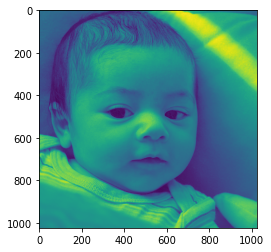

In [ ]:
from params import dataset_root, dataset_ext
from pathlib import Path
import os

# get the dataset info
dataset_key = list(dataset_root.keys())[0]
dataset_path = dataset_root.get(dataset_key)
dataset_img_ext = dataset_ext.get(dataset_key)

# print(dataset_key)
# print(dataset_path)
# print(dataset_img_ext)
# print(list(Path(dataset_path).glob('**/*.{}'.format(dataset_img_ext))))

# create a generator to get only the first item
gen = Path(dataset_path).glob('**/*.{}'.format(dataset_img_ext))
img_path = str(next(gen))
base = 10

# show the image
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imread(img_path)
plt.imshow(img);


In [ ]:
img_path = '/content/gdrive/MyDrive/VisionPE/anime.webp'

/content/gdrive/MyDrive/VisionPE/icpr-benford-gan/.temp/4c0cca14aea44af1af39bf3ef841b73a.jpg


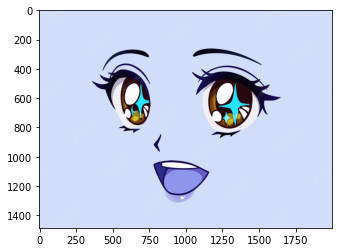

In [ ]:
# convert it to jpg if not

import io
import cv2
import uuid
import numpy as np
from PIL import Image
from params import base_list, dataset_root, dataset_ext, fd_hist_root, tmp_path

# load image

"""
from PIL import Image
img = Image.open(path).convert('L')

If you have a P mode image, that means it is palettised. 
That means there is a palette with up to 256 different colours in it, 
and instead of storing 3 bytes for R, G and B for each pixel, 
you store 1 byte which is the index into the palette. This confers 
both advantages and disadvantages. The advantage is that your image 
requires 1/3 of the space in memory and on disk. The disadvantage 
is that it can only represent 256 unique colours - so you may get 
banding or artefacts.

If you have an L mode image, that means it is a single channel image 
- normally interpreted as greyscale. The L means that is just stores 
the Luminance. It is very compact, but only stores a greyscale, not colour.
"""

if img_path.split('.')[-1] == 'webp':
  img = Image.fromarray(cv2.imread(img_path))
else:
  img = Image.open(img_path).convert('L')

# JPEG recompression
jpeg_recompression = False
recompression_qf = None
qf = np.random.randint(low=85, high=101) if recompression_qf is None else recompression_qf

if jpeg_recompression:
  buffer = io.BytesIO()
  np.random.seed(int.from_bytes(os.urandom(4), byteorder='little'))  # needed for real multiprocessing randomness
  img.save(buffer, 'JPEG', quality=qf)
  img = Image.open(buffer).convert('L')

# DCT extraction
tmp_name = uuid.uuid4().hex + '.jpg' # create a name using MAC address and current timestamp
# taken from http://discourse.techart.online/t/pil-wait-for-image-save/3994/9
with open(os.path.join(tmp_path, tmp_name), 'wb') as tmp_file:
  img.save(tmp_file, 'JPEG', quality=qf)
  tmp_file.flush()
  os.fsync(tmp_file)

new_path = os.path.join(tmp_path, tmp_name)
print(new_path)

# show the image
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imread(new_path)
plt.imshow(img, cmap="gray")

#### DCT extraction of a single image

In [ ]:
from pathlib import Path
from params import dataset_root, dataset_ext
import numpy as np
import jpeg

def extract_features_from_dct(img_path):
    # Params
    b = 8
    # Block-wise 2D-DCT (Luma only)
    img = jpeg.Jpeg(img_path)
    xmax, ymax = img.getcomponentdimensions(0)
    blocks_dct = np.zeros((xmax * ymax, b, b))
    cnt = 0
    for y in range(ymax):
        for x in range(xmax):
            block = img.getblock(x, y, 0)
            blocks_dct[cnt, :, :] = np.frombuffer(block, dtype=np.int16).reshape((8, 8))
            cnt += 1
    return blocks_dct

# try the dct extraction with the image
img_dct = extract_features_from_dct(new_path)

# img_dct -> array containing all the 8x8 blocks in which we split the image 

# emulate the block size outside the function
xmax, ymax = jpeg.Jpeg(new_path).getcomponentdimensions(0)
n_blocks = xmax * ymax

print('Image shape: {}'.format(img.shape))
print('              {} x {}'.format(img.shape[0], img.shape[1]))
print('Dividing into {} blocks'.format(n_blocks))
print('Block shape: {}'.format(img_dct[0].shape))

print()

print('First block:')
print(img_dct[0])


Image shape: (1486, 2000, 3)
              1486 x 2000
Dividing into 46500 blocks
Block shape: (8, 8)

First block:
[[249.   0.   0.   0.   0.   0.   0.   0.]
 [  3.   0.   0.   0.   0.   0.   0.   0.]
 [  3.   0.   0.   0.   0.   0.   0.   0.]
 [  3.   0.   0.   0.   0.   0.   0.   0.]
 [  2.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


#### Vectorize

In [ ]:
# vectorize and remove DC
img_dct = img_dct.reshape(-1, 64) # reshape the blocks to have size (1x64)

# img_dct should have one element for each block, as before, and each element 
# should be a 64-element array instread of a 8x8 2d matrix

# remove the first element, only god knows why
img_dct = img_dct[:, 1:] 

# img_dct should have n blocks each with 63 dct coefficients in a row

print('DCT coefficients for the first block of the image')
print(img_dct[0])
print('Elements: {}'.format(img_dct[0].size))
print('Shape:   {}'.format(img_dct[0].shape))

DCT coefficients for the first block of the image
[0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 3.
 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elements: 63
Shape:   (63,)


#### Compute first digit vector

In [ ]:
import numpy as np

def first_digit_gen(d: float, base):
    return np.floor(np.abs(d) / base ** np.floor(np.log(np.abs(d)) / np.log(base)))

# example
eg = np.arange(10, 800, 50)
fd_eg = first_digit_gen(eg, base)

formatted_eg = ' '.join(['{:>5}'.format(item) for item in eg])
formatted_fd = ' '.join(['{:>5}'.format(item) for item in fd_eg])

print('Sample array: ', formatted_eg)
print('First digits: ', formatted_fd)

# now back to the important stuff

# ignore the 0 division warnings
np.seterr(all="ignore")

fd = first_digit_gen(img_dct, base)

print()
print('First digit for the first block of the image')
print(fd[0])


Sample array:     10    60   110   160   210   260   310   360   410   460   510   560   610   660   710   760
First digits:    1.0   6.0   1.0   1.0   2.0   2.0   3.0   3.0   4.0   4.0   5.0   5.0   6.0   6.0   7.0   7.0

First digit for the first block of the image
[nan nan nan nan nan nan nan  3. nan nan nan nan nan nan nan  3. nan nan
 nan nan nan nan nan  3. nan nan nan nan nan nan nan  2. nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]


#### Reorder in zig zag mode

In [ ]:

zig_zag_idx = np.asarray([0, 1, 5, 6, 14, 15, 27, 28, 2, 4, 7, 13, 16, 26, 29, 42,
                          3, 8, 12, 17, 25, 30, 41, 43, 9, 11, 18, 24, 31, 40, 44, 53,
                          10, 19, 23, 32, 39, 45, 52, 54, 20, 22, 33, 38, 46, 51, 55, 60,
                          21, 34, 37, 47, 50, 56, 59, 61, 35, 36, 48, 49, 57, 58, 62, 63])

# reordering in zig zag order
fd_old = fd
fd = fd[:, zig_zag_idx[1:] - 1]

print('Ordered first digit')
print(fd[0])

Ordered first digit
[nan nan nan nan nan nan nan nan nan nan nan  3. nan nan nan nan  3. nan
 nan nan nan nan nan nan nan nan  3. nan  1. nan nan nan nan nan  2. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]


Why do we need to reorder? 

Depending on the quantization, more and more coefficients are reduced to zero. The probability is very high that these coefficients with value 0 are found in the higher frequencies rather than in the lower frequencies. The data is then reordered that way: the values are sorted by spatial frequency, first the low frequencies and then the high ones. After reordering, it is very likely that we have some values at the beginning and then a lot of 0. Instead of storing “0 0 0 0 0 0 0 0 0 0”, we can easily store “10x 0”. That way, the amount of data is also reduced significantly.

![](https://www.image-engineering.de/content/library/technotes/2011_09_19/encoding.jpg)

In [ ]:

zig_zag_idx = np.asarray([0, 1, 5, 6, 14, 15, 27, 28, 2, 4, 7, 13, 16, 26, 29, 42,
                          3, 8, 12, 17, 25, 30, 41, 43, 9, 11, 18, 24, 31, 40, 44, 53,
                          10, 19, 23, 32, 39, 45, 52, 54, 20, 22, 33, 38, 46, 51, 55, 60,
                          21, 34, 37, 47, 50, 56, 59, 61, 35, 36, 48, 49, 57, 58, 62, 63])

arr = np.asarray([[j*8 + i for i in range(8)] for j in range(8)])
arr = arr.flatten()
arr = arr[zig_zag_idx]
arr = arr.reshape(8, 8)

print('Algorithm: ')
print(arr)
print()
print(arr)

print()

print('Before: ')
print(np.append(fd_old[0], [0]).reshape(8, 8))
print()
print('After: ')
print(np.append(fd[0], [0]).reshape(8, 8))


Algorithm: 
[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]

[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]

Before: 
[[nan nan nan nan nan nan nan  3.]
 [nan nan nan nan nan nan nan  3.]
 [nan nan nan nan nan nan nan  3.]
 [nan nan nan nan nan nan nan  2.]
 [nan nan nan nan nan nan nan  1.]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan  0.]]

After: 
[[nan nan nan nan nan nan nan nan]
 [nan nan nan  3. nan nan nan nan]
 [ 3. nan nan nan nan nan nan nan]
 [nan nan  3. nan  1. nan nan nan]
 [nan nan  2. nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan na

#### Clean the temp variables

In [ ]:
from params import tmp_path
import glob

tmp_file_list = glob.glob(os.path.join(tmp_path, '*.jpg'))
[os.remove(x) for x in tmp_file_list]


[None]

#### Compute histograms

Histogram for the first block
[0.4164092  0.22348095 0.1292482  0.07191898 0.04514246 0.03724682
 0.03295572 0.02197048 0.02162719]
Frequency for digit 0 as first digit: 0.41640920013731547
Frequency for digit 1 as first digit: 0.223480947476828
Frequency for digit 2 as first digit: 0.12924819773429455
Frequency for digit 3 as first digit: 0.07191898386543083
Frequency for digit 4 as first digit: 0.04514246481290766
Frequency for digit 5 as first digit: 0.03724682457947134
Frequency for digit 6 as first digit: 0.032955715756951595
Frequency for digit 7 as first digit: 0.021970477171301066
Frequency for digit 8 as first digit: 0.021627188465499485
Sum: 0.9999999999999999


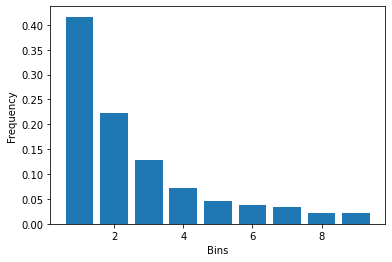

In [ ]:
def compute_histograms(img: np.ndarray, base: int, n_freq: int = 9):
    h_img = []
    for k in range(n_freq): # for each number from 1 to 9 (inclusive)
        try:
            # take frequency k from each block
            # make the histogram with it
            h, _ = np.histogram(img[:, k], range=(np.nanmin(img[:, k]), np.nanmax(img[:, k])),
                                bins=np.arange(0.5, base + 0.5, 1), density=True)
        except ValueError:
            h = np.zeros(base - 1, dtype=np.float64)
        h_img += [h]

    return np.asarray(h_img)

# ignore the warnings
np.seterr(all="ignore")

# computing histograms
ff = compute_histograms(fd, base)

print('Histogram for the first block')
print(ff[0])

for i in range(9):
  print('Frequency for digit {} as first digit: {}'.format(i, ff[0][i]))

print('Sum: {}'.format(np.sum(ff[0])))

# plot the histogram
import matplotlib.pyplot as plt 

# default bins = 10
x = np.arange(1, 10, 1)
y = np.array([ff[0][i - 1] for i in x])
# print(x)
# print(y)

plt.bar(x, y, align='center') # bar chart
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

### Step 3

In [ ]:
# step 3: compute features from histograms

!python extract_features_from_hist.py

python3: can't open file 'extract_features_from_hist.py': [Errno 2] No such file or directory


### Visualize results


Since pickle files contain complete python objects I doubt you can select columns whilst loading them or atleast it seems pandas doesnt support that directly. But you can first load it completely and then filter for the columns

In [ ]:
import pandas as pd
import os
from params import coeff_list, base_list, compression_list
from params import fd_hist_root, features_div_root
from pathlib import Path

# create a generator to get only the first item
gen = sorted(Path(features_div_root).glob('**/*.pkl'))
pkl_path = str(gen[0])

# columns=['mse', 'popt_0', 'popt_1', 'popt_2', 'kl', 'reny', 'tsallis']
ff_df = pd.read_pickle(pkl_path)

print(ff_df)

            mse    popt_0    popt_1    popt_2        kl      reny   tsallis
0      0.005936  0.059160 -0.999999  0.036771  0.884578  0.260970  0.175279
1      0.003428  0.096298 -0.999483  0.106486  0.548320  0.161495  0.109775
2      0.004819  0.046660 -1.000000  0.012254  0.939759  0.273103  0.183134
3      0.004421  0.079921 -0.999881  0.069450  0.685883  0.201973  0.136620
4      0.005188  0.119909 -0.998700  0.175109  0.775983  0.226390  0.152689
...         ...       ...       ...       ...       ...       ...       ...
29995  0.006740  0.088887 -0.999912  0.104720  0.961121  0.281081  0.188334
29996  0.005668  0.099908 -0.999270  0.113524  0.820829  0.240133  0.161690
29997  0.004220  0.098571 -0.999561  0.117032  0.595136  0.175061  0.118802
29998  0.006576  0.049288 -1.000000  0.020752  0.821045  0.242916  0.163511
29999  0.006586  0.082535 -0.999959  0.090010  0.918374  0.270233  0.181302

[30000 rows x 7 columns]


### Step 4

In [ ]:
# step 4: run random forest classifier

!python rf_combinations_logo.py

python3: can't open file 'rf_combinations_logo.py': [Errno 2] No such file or directory


## Testing

To obtain results for test_compression=False run rf_combinations_logo.py. 

To obtain results for test_compression=True run rf_combinations_logo_test_only.py

In [ ]:
!python rf_combinations_logo.py

python3: can't open file 'rf_combinations_logo.py': [Errno 2] No such file or directory


### Check if a scrambled image is still classified as original by the architecture

original image size:  (300, 259)
scrambled image size: (300, 259)


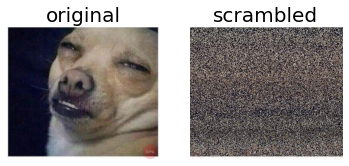

In [ ]:
import jpeg
import numpy as np
from PIL import Image

img_path = '/content/gdrive/MyDrive/VisionPE/doggo.jpg'
img_shuffled_path = '/content/gdrive/MyDrive/VisionPE/doggo_scrambled.jpg'

# open the image with jpeg library
jpeg_img = jpeg.Jpeg(img_path)

# open the image with PIL (to get the numpy array)
img = Image.open(img_path)
img_arr = np.asarray(img)

# shuffle its pixels
shuffle_rows = False
shuffle_cols = True

np_data = img_arr.copy() # otherwise we cannot write on the array
if shuffle_rows:
  np.random.shuffle(np_data) # scramble its rows
if shuffle_cols:
  for row in np_data:
    np.random.shuffle(row)

# save the image as jpeg
Image.fromarray(np_data).save(img_shuffled_path)

# open the new image with jpeg library
jpeg_img_shuffled = jpeg.Jpeg(img_shuffled_path)

# open the new image with PIL
img_shuffled = Image.open(img_shuffled_path)

print('original image size:  {}'.format(img.size))
print('scrambled image size: {}'.format(img_shuffled.size))

# visualize both of them
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline

plt.gray()
plt.subplot(121), plt.imshow(img), plt.axis('off'), plt.title('original', size=20)
plt.subplot(122), plt.imshow(img_shuffled), plt.axis('off'), plt.title('scrambled', size=20)
plt.show()


### Manual feature extraction

In [ ]:
import os
import warnings
from itertools import product

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import entropy
from tqdm import tqdm

from params import fd_hist_root, coeff_list, base_list, compression_list, dataset_ext, features_div_root

import glob
import io
import os
import uuid
import warnings

import cv2
import jpeg
from PIL import Image

from params import base_list, dataset_root, dataset_ext, fd_hist_root, tmp_path

def extract_features_from_dct(img_path):
    # Params
    b = 8
    # Block-wise 2D-DCT (Luma only)
    img = jpeg.Jpeg(img_path)
    xmax, ymax = img.getcomponentdimensions(0)
    blocks_dct = np.zeros((xmax * ymax, b, b))
    cnt = 0
    for y in range(ymax):
        for x in range(xmax):
            block = img.getblock(x, y, 0)
            blocks_dct[cnt, :, :] = np.frombuffer(block, dtype=np.int16).reshape((8, 8))
            cnt += 1
    return blocks_dct

def first_digit_gen(d: float, base):
    return np.floor(np.abs(d) / base ** np.floor(np.log(np.abs(d)) / np.log(base)))

zig_zag_idx = np.asarray([0, 1, 5, 6, 14, 15, 27, 28, 2, 4, 7, 13, 16, 26, 29, 42,
                          3, 8, 12, 17, 25, 30, 41, 43, 9, 11, 18, 24, 31, 40, 44, 53,
                          10, 19, 23, 32, 39, 45, 52, 54, 20, 22, 33, 38, 46, 51, 55, 60,
                          21, 34, 37, 47, 50, 56, 59, 61, 35, 36, 48, 49, 57, 58, 62, 63])

def compute_histograms(img: np.ndarray, base: int, n_freq: int = 9):
    h_img = []
    for k in range(n_freq): # for each number from 1 to 9 (inclusive)
        try:
            # take frequency k from each block
            # make the histogram with it
            h, _ = np.histogram(img[:, k], range=(np.nanmin(img[:, k]), np.nanmax(img[:, k])),
                                bins=np.arange(0.5, base + 0.5, 1), density=True)
        except ValueError:
            h = np.zeros(base - 1, dtype=np.float64)
        h_img += [h]

    return np.asarray(h_img)

def gen_benford(m, k, a, b):
    base = len(m)
    return k * (np.log10(1 + (1 / (a + m ** b))) / np.log10(base))


def renyi_div(pk, qk, alpha):
    r = np.log2(np.nansum((pk ** alpha) * (qk ** (1 - alpha)))) / (alpha - 1)
    return r


def tsallis_div(pk, qk, alpha):
    r = (np.nansum((pk ** alpha) * (qk ** (1 - alpha))) - 1) / (alpha - 1)
    return r

def feature_extraction(ff: np.ndarray):

    # Given a base b, we compute the first digit of the n-th
    # quantized 2D-DCT frequency sample from the k-th block
    # according to:
    # def first_digit_gen(d: float, base):
    #   return np.floor(np.abs(d) / base ** np.floor(np.log(np.abs(d)) / np.log(base)))

    base = len(ff) + 1

    mse_img = []
    popt_img = []
    kl_img = []
    renyi_img = []
    tsallis_img = []

    ff_zeroes_idx = ff == 0
    try:

        # Compute regular features

        # from the paper:
        # 'We fit generalized Benford's law expressed as:
        # def gen_benford(m, k, a, b):
        #   base = len(m)
        #   return k * (np.log10(1 + (1 / (a + m ** b))) / np.log10(base))
        # by solving a mean square error minimization problem'

        # from the docs:
        # curve_fit: use non-linear least squares to fit a function, f, to data.
        
        # given a function with some parameters, a set of input values x, and a set of corresponding 
        # values y, curve_fit returns the parameters that make the function better fit the avaiable data
        # https://1.bp.blogspot.com/-LSjMAWMCAPs/X2qp0gguUYI/AAAAAAAAA-E/14sGSZrek34YovP3Y2OPjrUNplnsNASHQCLcBGAsYHQ/s1160/curve_fit_example.png
        # the curve_fit() function returns an optimal parameters and estimated covariance values as an output.
        popt_k, _ = curve_fit(gen_benford, np.arange(1, base, 1), ff)

        h_fit = gen_benford(np.arange(1, base, 1), *popt_k)

        h_fit_zeroes_idx = h_fit == 0

        zeroes_idx = np.logical_or(ff_zeroes_idx, h_fit_zeroes_idx)

        ff_no_zeroes = ff[~zeroes_idx]
        h_fit_no_zeroes = h_fit[~zeroes_idx]

        popt_img += [popt_k]
        mse_img += [np.mean((ff - h_fit) ** 2)]

        kl_img += [entropy(pk=ff_no_zeroes, qk=h_fit_no_zeroes, base=2) +
                   entropy(pk=h_fit_no_zeroes, qk=ff_no_zeroes, base=2)]
        renyi_img += [renyi_div(pk=ff_no_zeroes, qk=h_fit_no_zeroes, alpha=0.3) +
                      renyi_div(pk=h_fit_no_zeroes, qk=ff_no_zeroes, alpha=0.3)]
        tsallis_img += [tsallis_div(pk=ff_no_zeroes, qk=h_fit_no_zeroes, alpha=0.3) +
                        tsallis_div(pk=h_fit_no_zeroes, qk=ff_no_zeroes, alpha=0.3)]

    except (RuntimeError, ValueError):
        mse_img += [np.nan]
        popt_img += [(np.nan, np.nan, np.nan)]
        kl_img += [np.nan]
        renyi_img += [np.nan]
        tsallis_img += [np.nan]

    mse = np.asarray(mse_img)
    popt = np.asarray(popt_img)
    kl = np.asarray(kl_img)
    renyi = np.asarray(renyi_img)
    tsallis = np.asarray(tsallis_img)

    return mse, popt[:, 0], popt[:, 1], popt[:, 2], kl, renyi, tsallis

def compute_hist (img_path, base=10):

  # try the dct extraction with the image
  img_dct = extract_features_from_dct(img_path)

  # vectorize and remove DC
  img_dct = img_dct.reshape(-1, 64) # reshape the blocks to have size (1x64)

  # remove the first element, only god knows why
  img_dct = img_dct[:, 1:] 

  # extract first digit
  fd = first_digit_gen(img_dct, base)

  # reordering in zig zag order
  fd = fd[:, zig_zag_idx[1:] - 1]

  # computing histograms
  hist = compute_histograms(fd, base)
  hist = np.asarray(hist)

  return hist

def compute_features (img_path, base=10):

  # try the dct extraction with the image
  img_dct = extract_features_from_dct(img_path)

  # vectorize and remove DC
  img_dct = img_dct.reshape(-1, 64) # reshape the blocks to have size (1x64)

  # remove the first element, only god knows why
  img_dct = img_dct[:, 1:] 

  # extract first digit
  fd = first_digit_gen(img_dct, base)

  # reordering in zig zag order
  fd = fd[:, zig_zag_idx[1:] - 1]

  # computing histograms
  ff = compute_histograms(fd, base)
  ff = np.asarray(ff)

  # extract features
  coeff = 8
  features = feature_extraction(ff[:, coeff])
  ff = np.squeeze(np.array(features))

  return ff


img_path = '/content/gdrive/MyDrive/VisionPE/doggo.jpg'
features = compute_features (img_path)
print(features)

[3.26471393e-04 1.05739881e+04 1.53217784e+05 8.98814918e+00
 3.89127902e+00 1.00964961e+01 2.61005604e+00]


In [ ]:
import pandas as pd
from params import dataset_root, dataset_label
import glob
import tqdm

output_path = '/content/gdrive/MyDrive/VisionPE/icpr-benford-gan/results/dataframe_clean/'
data = []

#os.mkdir(output_path)

# suppose all the images are jpg
for dataset in dataset_root.keys():

  dataset_path = dataset_root[dataset]
  dataset_lbl = dataset_label[dataset]

  print('Adding entries for dataset {}'.format(dataset))

  y = 0
  if '_gan' in dataset:
    y = 1

  for image in tqdm.tqdm(glob.iglob(os.path.join(dataset_path, '*.*'))):

      features = compute_features(image)
      data.append(np.append(features, [y, dataset_lbl]))

df = pd.DataFrame(data, columns=['mse', 'popt_0', 'popt_1', 'popt_2', 'kl', 'reny', 'tsallis', 'y', 'dataset_label'])
df.to_csv(os.path.join(output_path, 'dataframe.csv'))


Adding entries for dataset images1024x1024_orig_0_jpg


5it [00:01,  3.42it/s]<ipython-input-37-9ee55dcee1a3>:54: RuntimeWarning: All-NaN slice encountered
  h, _ = np.histogram(img[:, k], range=(np.nanmin(img[:, k]), np.nanmax(img[:, k])),
47it [01:02,  3.70it/s]/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
1000it [02:47,  5.95it/s]


Adding entries for dataset images1024x1024_orig_1_jpg


1000it [01:59,  8.39it/s]


Adding entries for dataset images1024x1024_orig_2_jpg


1000it [01:45,  9.44it/s]


Adding entries for dataset images1024x1024_orig_3_jpg


1000it [01:46,  9.39it/s]


Adding entries for dataset images1024x1024_orig_4_jpg


1000it [01:46,  9.43it/s]


Adding entries for dataset images1024x1024_orig_5_jpg


1000it [01:48,  9.22it/s]


Adding entries for dataset images1024x1024_orig_6_jpg


1000it [01:45,  9.50it/s]


Adding entries for dataset images1024x1024_orig_7_jpg


1000it [02:05,  7.99it/s]


Adding entries for dataset images1024x1024_orig_8_jpg


1000it [01:50,  9.09it/s]


Adding entries for dataset images1024x1024_orig_9_jpg


1000it [01:46,  9.38it/s]


Adding entries for dataset images1024x1024_orig_10_jpg


1000it [01:45,  9.48it/s]


Adding entries for dataset images1024x1024_orig_11_jpg


1000it [01:47,  9.32it/s]


Adding entries for dataset images1024x1024_orig_12_jpg


619it [01:10,  8.77it/s]


KeyboardInterrupt: ignored

In [ ]:
X = df[['kl', 'reny', 'tsallis']]
y = df['y']
y_logo = df['dataset_label']

# remove inf values
non_inf_idx = ~np.isinf(X).any(axis=1)
X = X[non_inf_idx]
y = y[non_inf_idx]
y_logo = y_logo[non_inf_idx]

# replace nan values
nan_idx = np.isnan(X)
X[nan_idx] = -999

from sklearn.model_selection import train_test_split

# split dataset into 70% training set and 40% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# use the dataframe to train a random forest with the same sattings 
# as the ones they tried

# import random forest model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# train the model
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



In [ ]:
%%bash
path=/content/gdrive/MyDrive/VisionPE/data/FaceForensics_Images.zip
unzip $path -d /content/gdrive/MyDrive/VisionPE/data/FaceForensics_Images

In [ ]:
# visualize both of them
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline

orig_img_path = '/content/gdrive/MyDrive/VisionPE/data/celebAHQ/images1024x1024/00001.jpg'
gan_img_path = '/content/gdrive/MyDrive/VisionPE/data/images1024x1024_jpg/00000_jpg/00000.jpg'

# model prediction for the original image
features_orig = compute_features(orig_img_path)
y_pred = clf.predict([features_orig[4:7]])
print('Original image')
print('Ground truth: {}'.format(0))
print('Prediction:   {}\n'.format(y_pred[0]))

# plot benford curve 
hist_orig =  compute_hist(orig_img_path)

# model prediction for the gan generated image
features_gan = compute_features(gan_img_path)
y_pred_gan = clf.predict([features_gan[4:7]])
print('Gan generated image')
print('Ground truth: {}'.format(1))
print('Prediction:   {}\n'.format(y_pred[0]))

# plot benford curve 
hist_gan =  compute_hist(gan_img_path)

# print divergence from benford curve for both of them
print('Divergence:   {}'.format(features_gan))
print('              {}'.format(features_orig))


# plot everything

import matplotlib.image as mpimg

img_gan = np.uint8(mpimg.imread(gan_img_path))
img_orig = np.uint8(mpimg.imread(orig_img_path))

x = np.arange(1, 10, 1) # default bins = 10

fig = plt.figure()

# show original image
fig.add_subplot(221)
plt.title('original')
plt.set_cmap('gray')
plt.axis('off')
plt.imshow(img_orig)


fig.add_subplot(222)
y = np.array([hist_orig[0][i - 1] for i in x])
plt.bar(x, y, align='center') # bar chart
plt.xlabel('Bins')
plt.ylabel('Frequency')


fig.add_subplot(223)
plt.title('gan generated')
plt.set_cmap('gray')
plt.axis('off')
plt.imshow(img_gan)


fig.add_subplot(224)
y = np.array([hist_gan[0][i - 1] for i in x])
plt.bar(x, y, align='center') # bar chart
plt.xlabel('Bins')
plt.ylabel('Frequency')


plt.show() 